# **Sistem Rekomendasi Wisata Yogyakarta**

Indonesia adalah negara yang kaya akan keindahan alam dan juga budaya. Banyak turis atau wisatawan lokal yang sering berpergian pada tempat-tempat tertentu seperti contohnya pada Daerah Istimewa Yogyakarta,oleh karena itu untuk mempermudah wisatawan untuk mendapatkan rekomendasi wisata yang ingin dituju,sistem rekomendasi kali ini dapat membantu para wisatawan tersebut terkhusus di Yogyakarta.

**Sumber Dataset:** [Sistem Rekomendasi Wisata Yogyakarta](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data)

## **Import Library**

In [91]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,regularizers,Input,Model
# from tensorflow.keras.layers import Embedding, Dot, Flatten, Input
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, precision_score

## **Load Data**

In [92]:
wisata= pd.read_csv('tourism_with_id.csv') # fungsi untuk membaca data dengan tipe .csv
wisata.head() # Menampilkan 5 baris teratas pada tabel

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


**Insight:** Tabel dari tempat wisata

In [93]:
user= pd.read_csv('user.csv') # fungsi untuk membaca data dengan tipe .csv
user.head() # Menampilkan 5 baris teratas pada tabel

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


**Insight:** Tampilan tabel user

In [94]:
rating_wisata = pd.read_csv('tourism_rating.csv') # fungsii untuk membaca data dengan tipe .csv
rating_wisata.head() # Menampilkan 5 baris teratas pada tabel

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


**Insight:** Tabel dari raing wisata

## **Exploratory Analysis Data (EDA)**

### Data Understanding

In [95]:
print ("Jumlah Wisata: ",len(wisata.Place_Id.unique())) # Menampilkan jumlah wisata
print ("Jumlah User: ",len(user.User_Id.unique())) # Menampilkan jumlah user
print ("Jumlah Rating: ",len(rating_wisata.Place_Id.unique())) # Menampilkan jumlah rating

Jumlah Wisata:  437
Jumlah User:  300
Jumlah Rating:  437


**Insight:**
- Terdapat 437 Jumlah Wisata yang ada.
- Jumlah user sebanyak 300.
- Rating berdasarkan place_id berjumlah 437.

In [96]:
print ("Jumlah Semua Data Wisata: ", len(wisata)) # Menampilkan jumlah semua wisata
print ("Jumlah Semua Data User: ", len(user)) # Menampilkan jumlah semua user
print ("Jumlah Semua Data Rating: ", len(rating_wisata)) # Menampilkan jumlah semua rating

Jumlah Semua Data Wisata:  437
Jumlah Semua Data User:  300
Jumlah Semua Data Rating:  10000


**Insight:**
- Jumlah semua data wisata adalah 437.
- Jumlah semua user adalah 300.
- Jumlah semua rating adalah 10000.

In [97]:
wisata.info() #Menampilkan info dari tabel wisata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


**Insight:** Terdapat 13 kolom dengan tipe data 5 objek,3 integer,dan 5 float kemudian data yang kosong pada kolom unnamed 11 dan Time_Minutes,kemudian pada preprocessing,data kosong serta kolom unnamed 11 dan 12 akan di drop.

In [98]:
wisata.isna().sum() # Melihat jumlah data yang kosong dari tiap kolom

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


**Insight:** 232 data kosong pada kolom time_minutes dan 437 data kosong pada kolom unnamed: 11.

In [99]:
wisata.duplicated().sum() # Melihat jumlah data yang duplikat

np.int64(0)

In [100]:
wisata.shape # Melihat jumlah baris dan kolom

(437, 13)

**Insight:**Tidak terdapat data yang terduplikat

In [101]:
user.info() #Menampilkan info dari tabel user

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


**Insight:** Terdapat 3 kolom dengan tipe data  yaitu 2 integer dan 1 object,dan tidak terdapat data kosong.

In [102]:
user.duplicated().sum() # Melihat jumlah data yang duplikat

np.int64(0)

In [103]:
user.shape # Melihat jumlah baris dan kolom

(300, 3)

**Insight:**Tidak terdapat data yang duplikat

In [104]:
rating_wisata.info() #Menampilan info dari tabel rating_wisata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


**Insight:** Terdiri dari 3 kolom bertipe numerik dengan 3 integer dan tidak terdapat data yang kosong.

In [105]:
rating_wisata.duplicated().sum() # Melihat jumlah data yang duplikat

np.int64(79)

In [106]:
rating_wisata.shape # Melihat jumlah baris dan kolom

(10000, 3)

**Insight:** Terdapat data yang terdupliat sebanyak 79, akan tetapi kita ingin mempertahankan data tersebut,karena satu user bisa saja memberikan rating dan tempat untuk diberikan rating secara berulang.

### Data Preprocessing & Preparation

In [107]:
print('Data :', len(wisata.Place_Id.unique())) #Menampilkan jumlah data
print('Kota:', wisata.City.unique()) #Menampilkan nama-nama kota

Data : 437
Kota: ['Jakarta' 'Yogyakarta' 'Bandung' 'Semarang' 'Surabaya']


**Insight:** Terdapat 5 kota yaitu Jakarta Yogyakarta Bandung Semarang dan Surabaya

In [108]:
wisata = wisata.drop(columns=['Unnamed: 11'], axis=1) #Menghapus kolom unnamed: 11
wisata = wisata.drop(columns=['Unnamed: 12'], axis=1) #Menghapus kolom unnamed: 12
wisata = wisata.dropna() #Menghapus data kosong
wisata.head() #Menampilkan 5 baris teratas pada tabel wisata

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
5,6,Taman Impian Jaya Ancol,Taman Impian Jaya Ancol merupakan sebuah objek...,Taman Hiburan,Jakarta,25000,4.5,10.0,"{'lat': -6.117333200000001, 'lng': 106.8579951}",-6.117333,106.857995


**Insight:**Berhasil menghapus data kosong dan kolom yang tidak diperlukan yaitu unnamed: 11 dan 12

            jumlah Sebaran Data Wisata dan kota  persentase
City                                                       
Yogyakarta                                   60        29.3
Bandung                                      50        24.4
Jakarta                                      37        18.0
Surabaya                                     30        14.6
Semarang                                     28        13.7


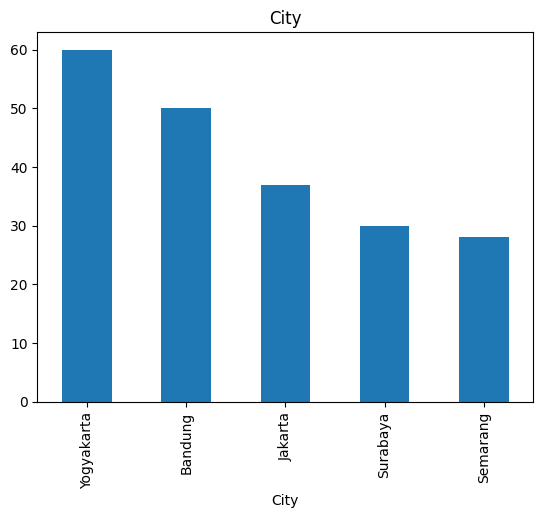

In [109]:
# Melihat sebaran distribusi data wisata dan kota
Fitur = 'City'
count = wisata[Fitur].value_counts()
percent = 100*wisata[Fitur].value_counts(normalize=True)
city = pd.DataFrame({'jumlah Sebaran Data Wisata dan kota':count, 'persentase':percent.round(1)})
print(city)
count.plot(kind='bar', title=Fitur);

**Insight:**Dari data sebaran diatas Yogyakarta memiliki jumlah wisata yang tinggi dengan nilai 60 atau 29% dari total semua wisata di tiap kota. Oleh karena itu sistem rekomendasi kali ini mengambil data Yogyakarta.


In [110]:
# Mengambil kota yogyakarta
wisataYogyakata= wisata[wisata['City']=='Yogyakarta']
wisataYogyakata

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,120.0,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304
90,91,Situs Warungboto,Situs Warungboto atau Pesanggrahan Rejawinangu...,Taman Hiburan,Yogyakarta,0,4.4,60.0,"{'lat': -7.8102685, 'lng': 110.3931513}",-7.810269,110.393151
91,92,Nol Kilometer Jl.Malioboro,"Walaupun hanyalah sebuah persimpangan, namun p...",Taman Hiburan,Yogyakarta,0,4.7,45.0,"{'lat': -7.8013803, 'lng': 110.3647652}",-7.801380,110.364765
95,96,Alun Alun Selatan Yogyakarta,Alun-alun Selatan atau yang sekarang lebih dik...,Taman Hiburan,Yogyakarta,0,4.6,60.0,"{'lat': -7.8116719, 'lng': 110.363238}",-7.811672,110.363238
96,97,Monumen Yogya Kembali,Museum Monumen Yogya Kembali (bahasa Jawa: ꦩꦺꦴ...,Budaya,Yogyakarta,15000,4.5,30.0,"{'lat': -7.7495904, 'lng': 110.3696068}",-7.749590,110.369607
97,98,Taman Pelangi Yogyakarta,Taman Pelangi Yogyakarta merupakan tempat wisa...,Taman Hiburan,Yogyakarta,15000,4.3,60.0,"{'lat': -7.7505259, 'lng': 110.3687049}",-7.750526,110.368705
99,100,Taman Budaya Yogyakarta,Taman Budaya Yogyakarta (TBY) (Hanacaraka:ꦠꦩꦤ꧀...,Budaya,Yogyakarta,0,4.5,210.0,"{'lat': -7.8001041, 'lng': 110.3676579}",-7.800104,110.367658
101,102,Monumen Batik Yogyakarta,Perhatian pemerintah megenai kebudayan batik i...,Budaya,Yogyakarta,40000,4.5,15.0,"{'lat': -7.8011159, 'lng': 110.3646172}",-7.801116,110.364617


**Insight:**Tampilan wisata di Yogyakarta

In [111]:
# Mengambil rating pada Yogyarkarta
rating_jogja = pd.merge(rating_wisata, wisataYogyakata[['Place_Id']], how='right', on='Place_Id')
rating_jogja

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4
...,...,...,...
1342,254,208,4
1343,258,208,5
1344,260,208,5
1345,262,208,3


**Insight**:Mengambil Data Rating Wisata Jogja untuk mengambil rating yang hanya di jogja dan untuk membuat model

In [112]:
#Mengambil data user dan digabungkan pada rating yogyakarta
user_jogja = pd.merge(user, rating_jogja[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user_jogja

,User_Id,Location,Age
239,1,"Semarang, Jawa Tengah",20
0,2,"Bekasi, Jawa Barat",21
194,3,"Cirebon, Jawa Barat",23
44,4,"Bekasi, Jawa Barat",21
630,5,"Lampung, Sumatera Selatan",20
...,...,...,...
173,296,"Lampung, Sumatera Selatan",31
75,297,"Palembang, Sumatera Selatan",39
346,298,"Bogor, Jawa Barat",38
286,299,"Sragen, Jawa Tengah",27


**Insight:** Menggabungkan data user dengan rating pada yogyakarta untuk membuat model.

In [113]:
#Menggabungkan semua data wisata pada Yogyakarta
Yogyakarta = rating_jogja
Yogyakarta

,User_Id,Place_Id,Place_Ratings
0,2,85,4
1,23,85,4
2,25,85,2
3,39,85,5
4,43,85,4
...,...,...,...
1342,254,208,4
1343,258,208,5
1344,260,208,5
1345,262,208,3


**Insight:**Sebelum membuat model,kita harus menggabungkan semua data rating dan tempat.

In [114]:
#Menghaous data yang terduplikat
Yogyakarta = Yogyakarta.drop_duplicates('Place_Id')

In [115]:
#Menggabungkan semua data
allYogyakarta = pd.merge(Yogyakarta, wisataYogyakata[['Place_Id','Place_Name','Category']], on='Place_Id', how='left')
allYogyakarta.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Category
0,2,85,4,Taman Pintar Yogyakarta,Taman Hiburan
1,40,87,2,Sindu Kusuma Edupark (SKE),Taman Hiburan
2,4,88,3,Museum Benteng Vredeburg Yogyakarta,Budaya
3,4,91,3,Situs Warungboto,Taman Hiburan
4,6,92,2,Nol Kilometer Jl.Malioboro,Taman Hiburan


**Insight:**Menggabungkan semua data dan siap membuat model dengan conten based filtering.

In [116]:
# Melihat banyaknya wisata di Yogyakarta
print('Banyak Data Wisata Yogyakarta :', len(allYogyakarta.Place_Name.unique()))

Banyak Data Wisata Yogyakarta : 60


**Insight:** Banyak data pada Yogyakarta adalah 60

                    jumlah Sebaran Jenis/Tipe Wisata Yogyakarta  persentase
Category                                                                   
Taman Hiburan                                                22        36.7
Cagar Alam                                                   16        26.7
Budaya                                                       15        25.0
Bahari                                                        6        10.0
Pusat Perbelanjaan                                            1         1.7


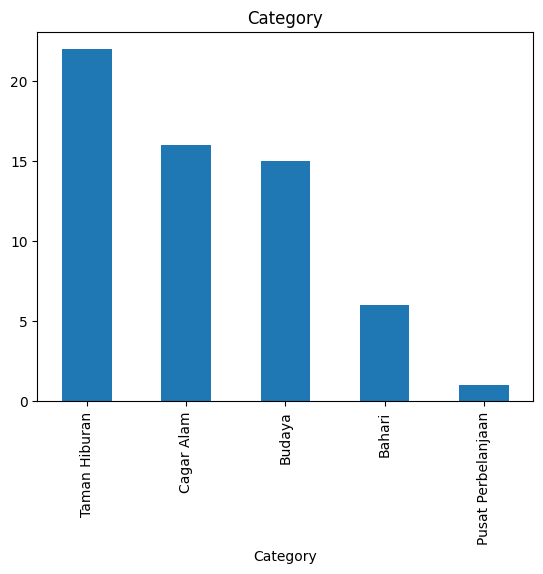

In [117]:
# Melihat distribusi jenis wisata yang ada di Yogyakarta
feature = 'Category' # Mengambil fitur/kolom kategori
count = allYogyakarta[feature].value_counts() #menghitung jumlah ketegori
percent = 100*allYogyakarta[feature].value_counts(normalize=True) #membuat persentase wisata
kategori = pd.DataFrame({'jumlah Sebaran Jenis/Tipe Wisata Yogyakarta':count, 'persentase':percent.round(1)}) #menampilkan tipe,jumlah dan persentase data
print(kategori)
count.plot(kind='bar', title=feature); #menampilkan grafik perbandingan

**Insight:**Membuat distribusi tipe wista guna untuk mengetahui jenis wisata apa yang paling banyak dan disi didapatkan bahwa taman hiburan yang paling banyak disusul dengan cagar alam.

In [118]:
new_jogja= allYogyakarta[['Place_Id','Place_Name','Category']] #Mengambil kolom yang diperlukan
new_jogja.head()

,Place_Id,Place_Name,Category
0,85,Taman Pintar Yogyakarta,Taman Hiburan
1,87,Sindu Kusuma Edupark (SKE),Taman Hiburan
2,88,Museum Benteng Vredeburg Yogyakarta,Budaya
3,91,Situs Warungboto,Taman Hiburan
4,92,Nol Kilometer Jl.Malioboro,Taman Hiburan


**Insight:**Menampilkan fitur-fitur yang diperlukan untuk conten based filtering

## **Build Model**

### Model Conten Based Filtering

In [119]:
# Inisialisasi TfidfVectorizer
cv = CountVectorizer()

cv.fit(allYogyakarta['Category'])
# Mengganti get_feature_names() dengan get_feature_names_out() karena get_feature_names() sudah deprecated
cv.get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'cagar', 'hiburan', 'perbelanjaan',
       'pusat', 'taman'], dtype=object)

**Insight:** Menginisialisasi tfidf vektorizer untuk mengubah teks menjadi representasi numerik (fitur)


In [120]:
tfidf_matrix = cv.fit_transform(allYogyakarta['Category'])# Mengambil kolom categori
tfidf_matrix.shape #melihat hasil

(60, 8)

**Insight:**mengubah setiap entri teks dalam kolom 'Category' menjadi vektor angka berdasarkan jumlah kemunculan kata CountVectorizer atau bobot TF-IDF TfidfVectorizer.

In [121]:
# Menghitung Similarty
cos = cosine_similarity(tfidf_matrix)
cos

array([[1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

**insight:**Menghitung similarity dari transform category sebelumnya

In [122]:
# Convert the cosine similarity matrix to a DataFrame with Place_Name as index and columns
cos_df = pd.DataFrame(cos, index=allYogyakarta['Place_Name'], columns=allYogyakarta['Place_Name'])

**Insight:**Berfungsi untuk mengonversi matriks similarity (dalam hal ini cosine similarity) menjadi sebuah DataFrame pandas yang lebih mudah dibaca dan diakses.



In [123]:
# Fungsi untuk memberikan rekomendasi tempat wisata di Yogyakarta
# berdasarkan kemiripan cosine similarity terhadap tempat wisata yang diberikan.

def rekomenjogja(wisataJogja, similarity_data=cos_df, items=allYogyakarta[['Place_Name', 'Category']], k=5):
    # wisataJogja       : string nama tempat wisata sebagai acuan rekomendasi
    # similarity_data   : DataFrame cosine similarity antar tempat wisata (default: cos_df)
    # items             : DataFrame berisi informasi nama dan kategori tempat wisata
    # k                 : jumlah rekomendasi tempat wisata yang ingin ditampilkan (default: 5)

    # Ambil indeks tempat wisata yang paling mirip berdasarkan similarity
    index = similarity_data.loc[:, wisataJogja].to_numpy().argpartition(
        range(-1, -k, -1))

    # Ambil nama tempat wisata terdekat berdasarkan skor similarity
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Hapus nama tempat wisata acuan agar tidak direkomendasikan ke dirinya sendiri
    closest = closest.drop(wisataJogja, errors='ignore')

    # Gabungkan hasil rekomendasi dengan data kategori tempat wisata
    return pd.DataFrame(closest).merge(items).head(k)


**Insight:**Fungsi wisata berhasil dibuat dan siap untuk di implementasi

In [124]:
#Implementasi
rekomenjogja('Situs Warungboto')

,Place_Name,Category
0,Jogja Exotarium,Taman Hiburan
1,Studio Alam Gamplong,Taman Hiburan
2,Bukit Lintang Sewu,Taman Hiburan
3,Puncak Kebun Buah Mangunan,Taman Hiburan
4,Desa Wisata Rumah Domes/Teletubbies,Taman Hiburan


**Insight:**5 rekomendasi ketika user mengunjungi situs warung boto

In [125]:
#Mengevaluasi model conten based dengan precission@k
def precision_at_k(wisataJogja, k=5):
    # Ambil kategori tempat acuan
    kategori_target = allYogyakarta.loc[allYogyakarta['Place_Name'] == wisataJogja, 'Category'].values[0]

    # Ambil rekomendasi
    hasil_rekomendasi = rekomenjogja(wisataJogja, k=k)

    # Hitung berapa yang kategori-nya sama → dianggap relevan
    hasil_rekomendasi['Relevan'] = hasil_rekomendasi['Category'].apply(lambda x: x == kategori_target)

    # Precision@K = jumlah yang relevan dibagi total yang direkomendasikan (k)
    precision = hasil_rekomendasi['Relevan'].sum() / k

    return precision

# Contoh evaluasi
p_at_5 = precision_at_k('Situs Warungboto', k=5)
print(f'Precision@k untuk "Situs Warungboto": {p_at_5:.2f}')


Precision@k untuk "Situs Warungboto": 1.00


**Insgiht:**Berdasarkan hasil pengujian dengan precission@k pada "situs warung boto" mendapatkan hasil 1.00 dimana ke 5 konten rekomendasi yang ditampilkan sesuai,dan memiliki kesamaan yang sangat mirip.

### Colaborative filtering

In [126]:
# Mengambil daftar unik User_Id dari dataset rating_jogja
user = rating_jogja['User_Id'].unique().tolist()
print('list userID: ', user)

# Membuat dictionary pemetaan dari User_Id asli ke indeks numerik (encoding user)
user_encoded = {x: i for i, x in enumerate(user)}
print('encoded userID : ', user_encoded)

# Membuat dictionary kebalikan: dari indeks numerik ke User_Id asli
user_encoded_user = {i: x for i, x in enumerate(user)}
print('encoded angka ke userID: ', user_encoded_user)

list userID:  [2, 23, 25, 39, 43, 52, 60, 68, 72, 74, 88, 93, 104, 132, 140, 157, 159, 165, 182, 233, 247, 262, 269, 276, 282, 40, 70, 92, 142, 160, 181, 184, 189, 199, 208, 211, 226, 271, 281, 290, 4, 6, 7, 11, 14, 18, 21, 41, 44, 64, 79, 91, 100, 107, 109, 154, 186, 193, 204, 207, 243, 256, 258, 265, 292, 297, 24, 71, 116, 143, 145, 148, 163, 168, 194, 196, 198, 219, 221, 250, 273, 277, 288, 291, 17, 27, 28, 94, 112, 115, 135, 195, 234, 239, 254, 61, 66, 67, 113, 151, 153, 156, 175, 206, 209, 227, 230, 244, 283, 286, 289, 55, 84, 124, 127, 213, 223, 268, 278, 295, 296, 8, 12, 137, 139, 173, 272, 280, 3, 80, 164, 176, 177, 178, 212, 215, 231, 245, 31, 42, 46, 53, 101, 117, 123, 133, 187, 242, 1, 22, 34, 37, 54, 56, 85, 225, 236, 246, 252, 266, 287, 300, 9, 76, 98, 158, 167, 190, 275, 299, 19, 95, 134, 138, 144, 294, 63, 89, 121, 122, 136, 147, 192, 229, 255, 259, 36, 38, 47, 65, 78, 152, 253, 260, 298, 30, 49, 119, 126, 131, 188, 15, 62, 87, 111, 183, 261, 69, 81, 105, 141, 228, 263, 

**Insight:**Berhasil memasukkan ke dalam list.

In [127]:
# Mengambil daftar unik Place_Id (tempat wisata) dari dataset
wisata = rating_jogja['Place_Id'].unique().tolist()

# Membuat dictionary pemetaan dari Place_Id asli ke indeks numerik (encoding wisata)
wisata_encoded = {x: i for i, x in enumerate(wisata)}

# Membuat dictionary kebalikan: dari indeks numerik ke Place_Id asli
wisata_encoded_wisata = {i: x for i, x in enumerate(wisata)}

**Insight:**Berhasil mengambil place_id dan memasukkannya kedalam list

In [128]:
# Menambahkan kolom baru 'user' di dataframe rating_jogja dengan hasil encoding user
rating_jogja['user'] = rating_jogja['User_Id'].map(user_encoded)

# Menambahkan kolom baru 'wisata' di dataframe rating_jogja dengan hasil encoding wisata
rating_jogja['wisata'] = rating_jogja['Place_Id'].map(wisata_encoded)

**Insight:**Menggabungkan kolom baru yaitu user dan wisata

In [129]:
# Normalisasi rating
min_rating = rating_jogja['Place_Ratings'].min()
max_rating = rating_jogja['Place_Ratings'].max()

rating_jogja['Place_Ratings'] = rating_jogja['Place_Ratings'].astype(np.float32)

# Use the encoded 'user' and 'wisata' columns for training data
x = rating_jogja[['user', 'wisata']].values
y = rating_jogja['Place_Ratings'].apply(lambda r: (r - min_rating) / (max_rating - min_rating)).values

# Split train dan validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

**Insight:**Normalisasi rating dan spil data

In [130]:
#Membuat fungsi dari kolaboratif filtering
class CollaborativeFilteringModel(tf.keras.Model):
    def __init__(self, num_users, num_items, embedding_size=50):
        super(CollaborativeFilteringModel, self).__init__()
        self.user_embedding = tf.keras.layers.Embedding(num_users, embedding_size)
        self.item_embedding = tf.keras.layers.Embedding(num_items, embedding_size)

    def call(self, inputs):
        user_vec = self.user_embedding(inputs[:, 0])
        item_vec = self.item_embedding(inputs[:, 1])
        return tf.reduce_sum(user_vec * item_vec, axis=1)

**Insight:**Model Berhasil dibuat

In [131]:
# Inisialisasi model
num_users = len(user_encoded)
num_items = len(wisata_encoded)

model = CollaborativeFilteringModel(num_users, num_items)
model.compile(optimizer='adam', loss='mse')

# Callback untuk mencatat RMSE per epoch
class RMSELogger(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.val_rmse = []  # Menyimpan RMSE tiap epoch

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(x_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        print(f"Epoch {epoch+1}, RMSE: {rmse:.4f}")
        self.val_rmse.append(rmse)

rmse_logger = RMSELogger()

# Training model dengan callback RMSELogger
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    verbose=1,
    callbacks=[rmse_logger]
)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Epoch 1, RMSE: 0.6494
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.4083
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Epoch 2, RMSE: 0.6491
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.4058
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 3, RMSE: 0.6488
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3911
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch 4, RMSE: 0.6481
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.4122
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 5, RMSE: 0.6470
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3816
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Epoch 6, RMSE: 0.6453
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3830
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 7, RMSE: 0.6427
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3602
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch 8, RMSE: 0.6389
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss:

**Insight:**Secara hasil RMSE berhasil turun

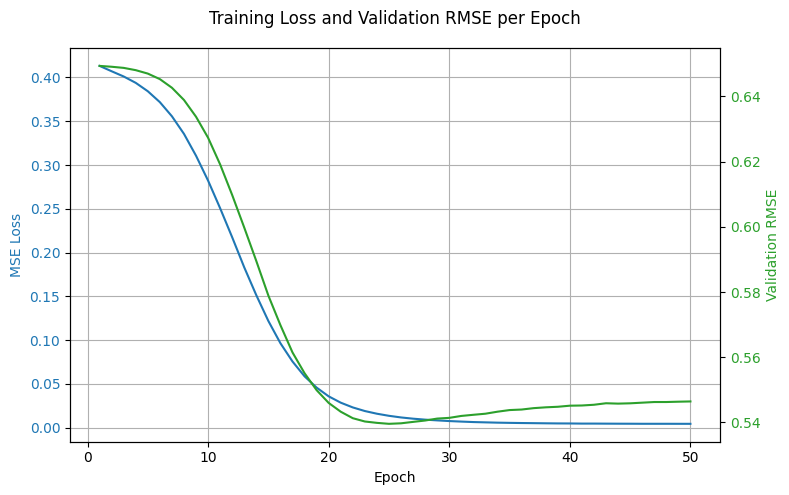

In [132]:
# Mengambil data loss dan RMSE
loss_values = history.history['loss']
rmse_values = rmse_logger.val_rmse
epochs = range(1, len(loss_values) + 1)

# Membuat visualisasi
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Loss di sumbu Y kiri
color_loss = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('MSE Loss', color=color_loss)
ax1.plot(epochs, loss_values, '-', color=color_loss, label='Loss')
ax1.tick_params(axis='y', labelcolor=color_loss)
ax1.grid(True)

# Plot RMSE di sumbu Y kanan (shared X-axis)
ax2 = ax1.twinx()
color_rmse = 'tab:green'
ax2.set_ylabel('Validation RMSE', color=color_rmse)
ax2.plot(epochs, rmse_values, '-', color=color_rmse, label='Validation RMSE')
ax2.tick_params(axis='y', labelcolor=color_rmse)

# Judul dan layout rapih
fig.suptitle('Training Loss and Validation RMSE per Epoch')
fig.tight_layout()

# Tampilkan plot
plt.show()

**Insight:**Berdasarkan visualisasi ke dua garisnya saling mengikuti

In [133]:
# Tentukan user ID yang ingin direkomendasikan
user_id = 10  # contoh user
user_idx = user_encoded[user_id]

# Buat pasangan (user, semua wisata)
all_wisata_idx = np.array(list(wisata_encoded.values()))
user_input = np.array([[user_idx, w] for w in all_wisata_idx])

# Prediksi rating
pred_ratings = model.predict(user_input)

# Denormalisasi (jika sebelumnya dilakukan normalisasi)
pred_ratings = pred_ratings * (max_rating - min_rating) + min_rating

# Urutkan berdasarkan rating tertinggi
top_indices = pred_ratings.argsort()[::-1]
top_wisata_ids = [list(wisata_encoded.keys())[i] for i in top_indices[:5]]
top_ratings = pred_ratings[top_indices[:5]]

# Tampilkan hasil rekomendasi lengkap dengan nama wisata
print("Top 5 Rekomendasi untuk User ID:", user_id)
for place, score in zip(top_wisata_ids, top_ratings):
    # Menggunakan DataFrame allYogyakarta untuk mendapatkan Place_Name
    place_name = allYogyakarta[allYogyakarta['Place_Id'] == place]['Place_Name'].values[0]
    print(f"{place_name} (ID: {place}): Predicted Rating = {score:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Top 5 Rekomendasi untuk User ID: 10
Desa Wisata Gamplong (ID: 134): Predicted Rating = 4.99
Pantai Timang (ID: 168): Predicted Rating = 4.92
Desa Wisata Kelor (ID: 151): Predicted Rating = 3.52
Desa Wisata Rumah Domes/Teletubbies (ID: 145): Predicted Rating = 3.10
Puncak Segoro (ID: 169): Predicted Rating = 3.06


**Insight:**Top 5 rekomendasi berdasarkan model colaboorative filtering.